# 05 - Topic and Cluster evaluation
This notebooks evaluates the results from the LSA and cluster analysis on the duurzaamheidsvisies. The results of both analyses are imported from a parquet file. The evaluation data are imported from preprocessed CSV files.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# read files containing topics, clusters and evaluation data
lsa_topics = pd.read_parquet("../data/Governance/LSA_document_topic_matrix.parquet")
kmeans_clusters = pd.read_parquet("../data/Governance/Kmeans_clusters.parquet")
documents = pd.read_csv("../data/Governance/Duurzaamheidsvisies.csv")
documents['Jaar'] = documents['Jaar'].fillna('0000').astype("string").str.slice(0, 4)
gemeenten = pd.read_parquet("../data/CBS/Evaluation_data.parquet")

TOPICS=list(lsa_topics.columns)
TOPICS

['samenleving', 'milieu', 'mens en natuur', 'energie']

In [3]:
# compose a dataframe with all information related to LSA topics
lsa_topics = lsa_topics.merge(documents, how="left", left_index=True, right_on='DocID')
lsa_topics['GM_Code'] = lsa_topics['DocID'].str.slice(0, 6)
lsa_topics = lsa_topics.merge(gemeenten, how="left", on='GM_Code')


In [4]:
# compose a dataframe with all information related to K-means clusters
kmeans_clusters = kmeans_clusters.merge(documents, how="left", left_index=True, right_on='DocID')
kmeans_clusters['GM_Code'] = kmeans_clusters['DocID'].str.slice(0, 6)
kmeans_clusters = kmeans_clusters.merge(gemeenten, how="left", on='GM_Code')


In [5]:
lsa_topics.loc[:, ['DocID', 'Gemeente', 'milieu', 'Titel', 'Jaar']].sort_values('milieu', ascending=False)[0:20]


,DocID,Gemeente,milieu,Titel,Jaar
15,GM0063DV01,het Bildt,0.430572,Milieubeleidsplan,2015
219,GM1729DV01,Gulpen-Wittem,0.419633,Milieubeleidsplan 2013-2016,2013
155,GM0733DV01,Lingewaal,0.415021,Kadernota Milieu,0000
208,GM1695DV01,Noord-Beveland,0.405778,MILIEU-UITVOERINGSPLAN 2011-2014 GEMEENTE NOOR...,2010
199,GM1651DV01,Eemsmond,0.392636,Milieujaarprogramma 2014,2014
182,GM0873DV01,Woensdrecht,0.390688,Milieu- en Duurzaamheidsbeleid 2012-2016,2012
46,GM0230DV01,Elburg,0.383145,Milieubeleidsplan Gemeente Elburg 2010-2013,2013
244,GM1987DV01,Menterwolde,0.381894,Milieubeleidsplan 2011,2011
149,GM0668DV01,West Maas en Waal,0.380308,milieubeleidsvisie,2013
150,GM0678DV01,Kapelle,0.377398,Leefomgevingsplan 2010-2014,2010


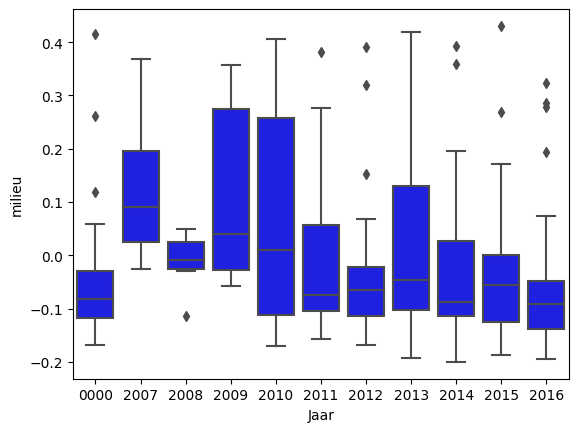

In [6]:
sns.boxplot(data=lsa_topics.sort_values('Jaar'), x='Jaar', y='milieu', color="blue");


Duurzaamheidsvisies die hoog score op het topic "milieu" zijn inderdaad vaker milieubeleidsplannen dan (integrale) duurzaamheidsvisies. Deze documenten zijn over het algemeen ook iets ouder dan de documenten met een lagere waarde voor het topic "milieu". Dit kan mede te maken hebben met de invoering van de omgevingsdiensten in 2013, waarbij veel van de uitvoerende taken op het gebied van milieu overgeheveld zijn van gemeenten naar omgevingsdiensten.

In [7]:
lsa_topics.loc[:, ['DocID', 'Gemeente', 'ruimtelijke inrichting', 'Titel', 'Jaar']].sort_values('ruimtelijke inrichting', ascending=False)[0:20]


KeyError: "['ruimtelijke inrichting'] not in index"

In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Gemeentegrootte', 'Inkomens_categorie', 'Stedelijkheidsgraad'])
fig.map(sns.boxplot);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Meeste_zetels'])
fig.map(sns.boxplot, order=["Lokaal", "SP", "PvdA", "D66", "CU", "CDA", "SGP", "VVD"]);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['PV'])
fig.map(sns.boxplot);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Windenergie_2012', 'Windenergie_2021', 'Windenergie_groei'])
fig.map(sns.boxplot, order=["Geen", "Beperkt", "Gemiddeld", "Veel"]);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Zonneenergie_2012', 'Zonneenergie_2021', 'Zonneenergie_groei'])
fig.map(sns.boxplot, order=["Geen", "Beperkt", "Gemiddeld", "Veel"]);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Aardgas_2016_cat', 'Aardgas_2021_cat', 'Aardgas_verschil_cat'])
fig.map(sns.boxplot);


In [ ]:
fig = sns.PairGrid(data=lsa_topics, palette="Blues",\
    x_vars=TOPICS,
    y_vars=['Elektriciteit_2016_cat', 'Elektriciteit_2021_cat', 'Elektriciteit_verschil_cat'])
fig.map(sns.boxplot);


---

## Evaluation of document clusters from TF-IDF - LSA - Kmeans

In [ ]:
# calculate chi-squared statistic for evaluation data, values lower than 0.05 the clusters are different than expected from random assignment
variables = kmeans_clusters.columns[11:28]
chi2_probabilities = []
for var in variables:
    crosstab = pd.crosstab(kmeans_clusters['labels'], kmeans_clusters[var])
    c, p, dof, expected = chi2_contingency(crosstab)
    chi2_probabilities.append([var, p])
    
chi2_probabilities_df = pd.DataFrame(chi2_probabilities, columns = ["Variable", "p-value"])
sns.barplot(y = 'Variable', x = 'p-value', data = chi2_probabilities_df);


In [ ]:
provincie_crosstab = pd.crosstab(kmeans_clusters['PV'], kmeans_clusters['labels'], normalize='index')
provincie_crosstab.plot(kind="bar", stacked=True);


In [ ]:
gemeentegrootte_crosstab = pd.crosstab(kmeans_clusters['Gemeentegrootte'], kmeans_clusters['labels'], normalize='index')
gemeentegrootte_crosstab.plot(kind="bar", stacked=True);


In [ ]:
inkomen_crosstab = pd.crosstab(kmeans_clusters['Inkomens_categorie'], kmeans_clusters['labels'], normalize='index')
inkomen_crosstab.plot(kind="bar", stacked=True);


In [ ]:
stedelijkheid_crosstab = pd.crosstab(kmeans_clusters['Stedelijkheidsgraad'], kmeans_clusters['labels'], normalize='index')
stedelijkheid_crosstab.plot(kind="bar", stacked=True);


In [ ]:
zetels_crosstab = pd.crosstab(kmeans_clusters['Meeste_zetels'], kmeans_clusters['labels'], normalize='index')
zetels_crosstab.plot(kind="bar", stacked=True);


In [ ]:
wind2012_crosstab = pd.crosstab(kmeans_clusters['Windenergie_2012'], kmeans_clusters['labels'], normalize='index')
wind2012_crosstab.plot(kind="bar", stacked=True);


In [ ]:
zon2012_crosstab = pd.crosstab(kmeans_clusters['Zonneenergie_2012'], kmeans_clusters['labels'], normalize='index')
zon2012_crosstab.plot(kind="bar", stacked=True);


In [ ]:
wind2021_crosstab = pd.crosstab(kmeans_clusters['Windenergie_2021'], kmeans_clusters['labels'], normalize='index')
wind2021_crosstab.plot(kind="bar", stacked=True);


In [ ]:
zon2021_crosstab = pd.crosstab(kmeans_clusters['Zonneenergie_2021'], kmeans_clusters['labels'], normalize='index')
zon2021_crosstab.plot(kind="bar", stacked=True);


In [ ]:
windgroei_crosstab = pd.crosstab(kmeans_clusters['Windenergie_groei'], kmeans_clusters['labels'], normalize='index')
windgroei_crosstab.plot(kind="bar", stacked=True);


In [ ]:
zongroei_crosstab = pd.crosstab(kmeans_clusters['Zonneenergie_groei'], kmeans_clusters['labels'], normalize='index')
zongroei_crosstab.plot(kind="bar", stacked=True);


In [ ]:
aardgas2016_crosstab = pd.crosstab(kmeans_clusters['Aardgas_2016_cat'], kmeans_clusters['labels'], normalize='index')
aardgas2016_crosstab.plot(kind="bar", stacked=True);


In [ ]:
elektriciteit2016_crosstab = pd.crosstab(kmeans_clusters['Elektriciteit_2016_cat'], kmeans_clusters['labels'], normalize='index')
elektriciteit2016_crosstab.plot(kind="bar", stacked=True);


In [ ]:
aardgas2021_crosstab = pd.crosstab(kmeans_clusters['Aardgas_2021_cat'], kmeans_clusters['labels'], normalize='index')
aardgas2021_crosstab.plot(kind="bar", stacked=True);


In [ ]:
elektriciteit2021_crosstab = pd.crosstab(kmeans_clusters['Elektriciteit_2021_cat'], kmeans_clusters['labels'], normalize='index')
elektriciteit2021_crosstab.plot(kind="bar", stacked=True);


In [ ]:
aardgasverschil_crosstab = pd.crosstab(kmeans_clusters['Aardgas_verschil_cat'], kmeans_clusters['labels'], normalize='index')
aardgasverschil_crosstab.plot(kind="bar", stacked=True);


In [ ]:
elektriciteitverschil_crosstab = pd.crosstab(kmeans_clusters['Elektriciteit_verschil_cat'], kmeans_clusters['labels'], normalize='index')
elektriciteitverschil_crosstab.plot(kind="bar", stacked=True);
